In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('ASOS.csv', index_col=0)
df.index.name=None
df.reset_index(inplace=True)
df.drop(df.index[129], inplace=True)

In [3]:
start = datetime.datetime.strptime("2006-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,129)]
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

In [4]:
df.columns= ['USA_LF', 'USA_UR', 'GSO_LF','GSO_UR','CLT_LF', 'CLT_UR', 'RDU_LF',
             'RDU_UR', 'Harrisburg_LF', 'Harrisburg_UR', 'RockHill_LF', 'RockHill_UR', 'Statesville_LF', 'Statesville_UR']

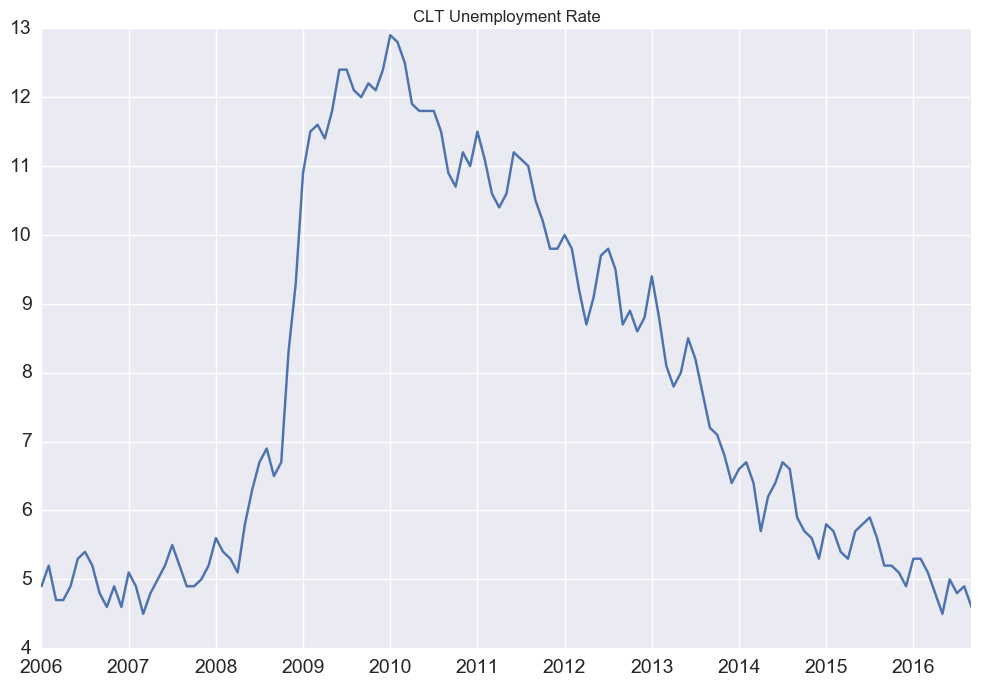

In [5]:
df.CLT_UR.plot(figsize=(12,8), title= 'CLT Unemployment Rate', fontsize=14).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.savefig('month_ridership.png', bbox_inches='tight')

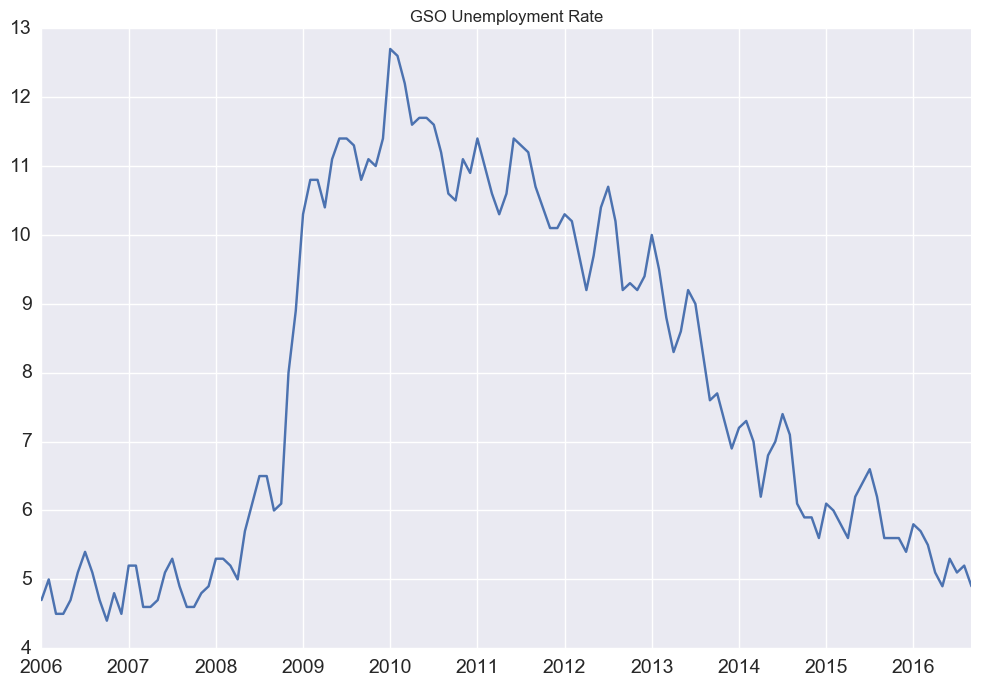

In [6]:
df.GSO_UR.plot(figsize=(12,8), title= 'GSO Unemployment Rate', fontsize=14).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.savefig('month_ridership.png', bbox_inches='tight')

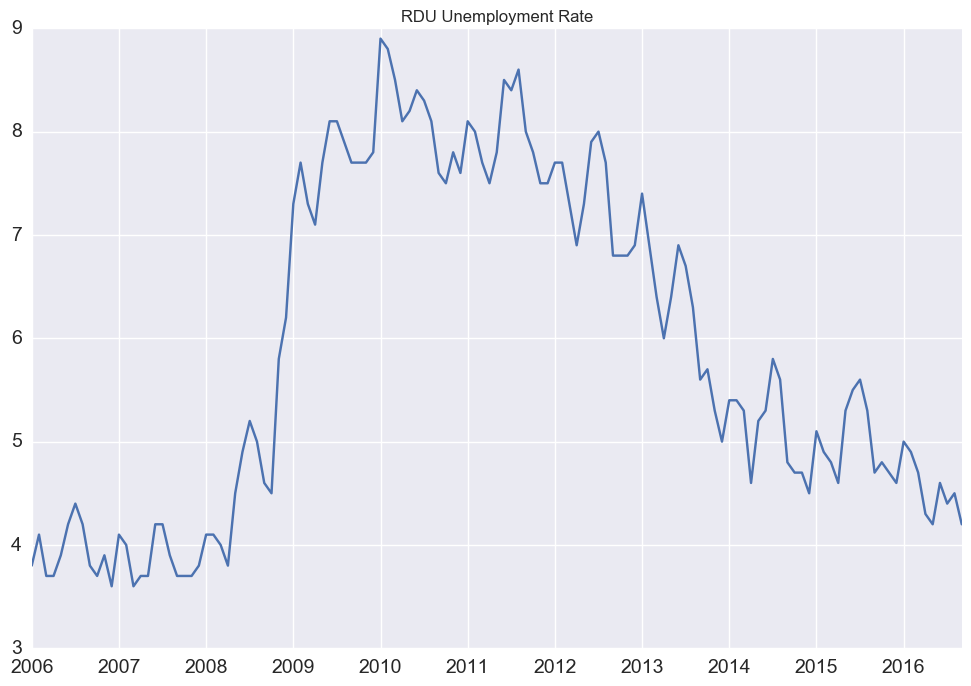

In [7]:
df.RDU_UR.plot(figsize=(12,8), title= 'RDU Unemployment Rate', fontsize=14).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.savefig('month_ridership.png', bbox_inches='tight')

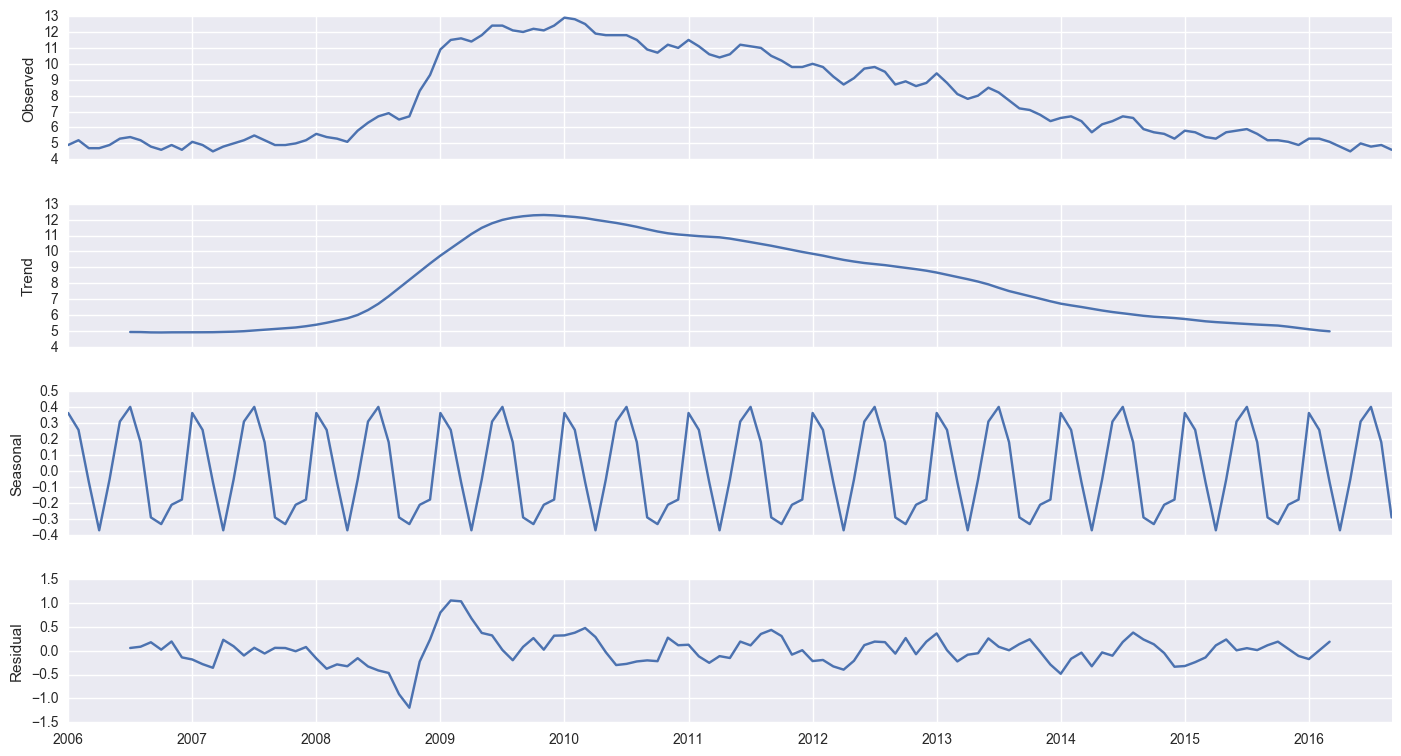

In [8]:
decomposition_CLT = seasonal_decompose(df.CLT_UR, freq=12)  
fig = plt.figure()  
fig = decomposition_CLT.plot()
fig.set_size_inches(15, 8)

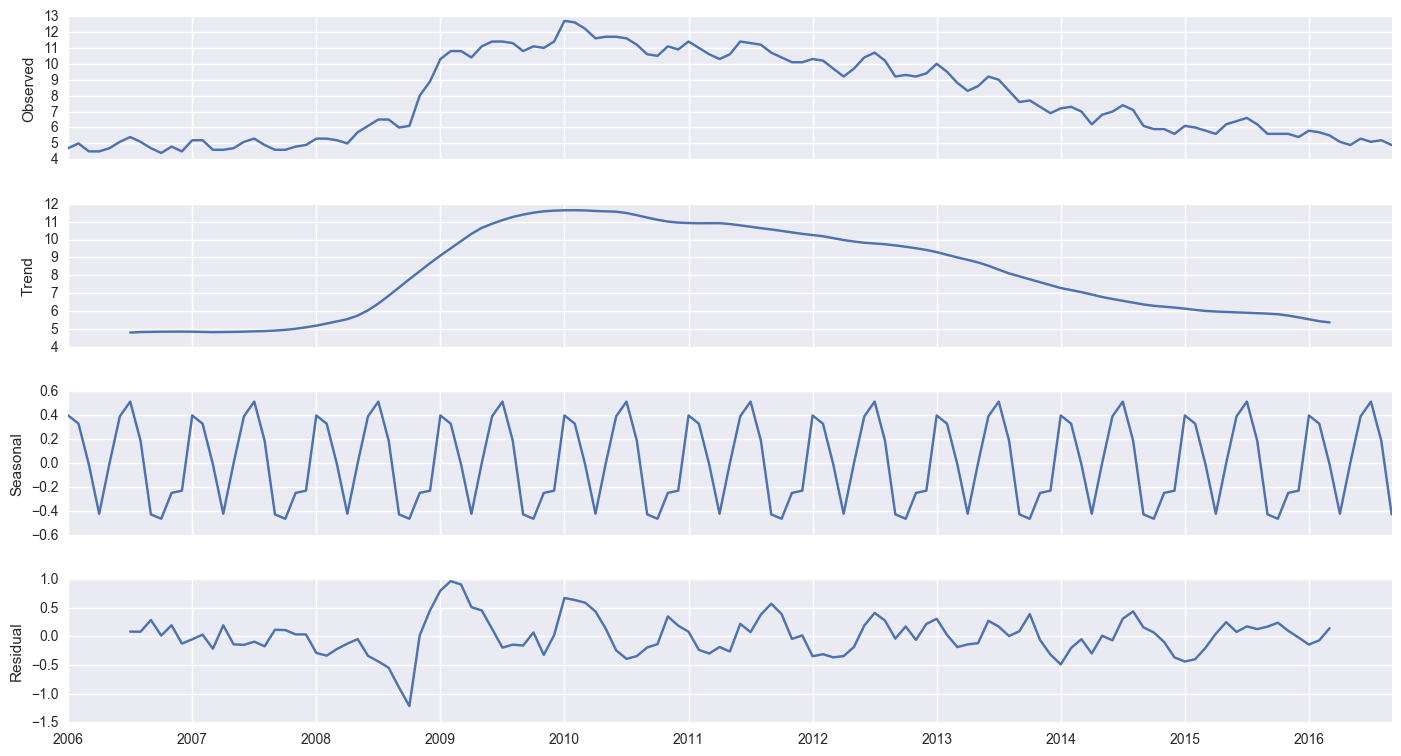

In [9]:
decomposition_GSO = seasonal_decompose(df.GSO_UR, freq=12)  
fig = plt.figure()  
fig = decomposition_GSO.plot()  
fig.set_size_inches(15, 8)

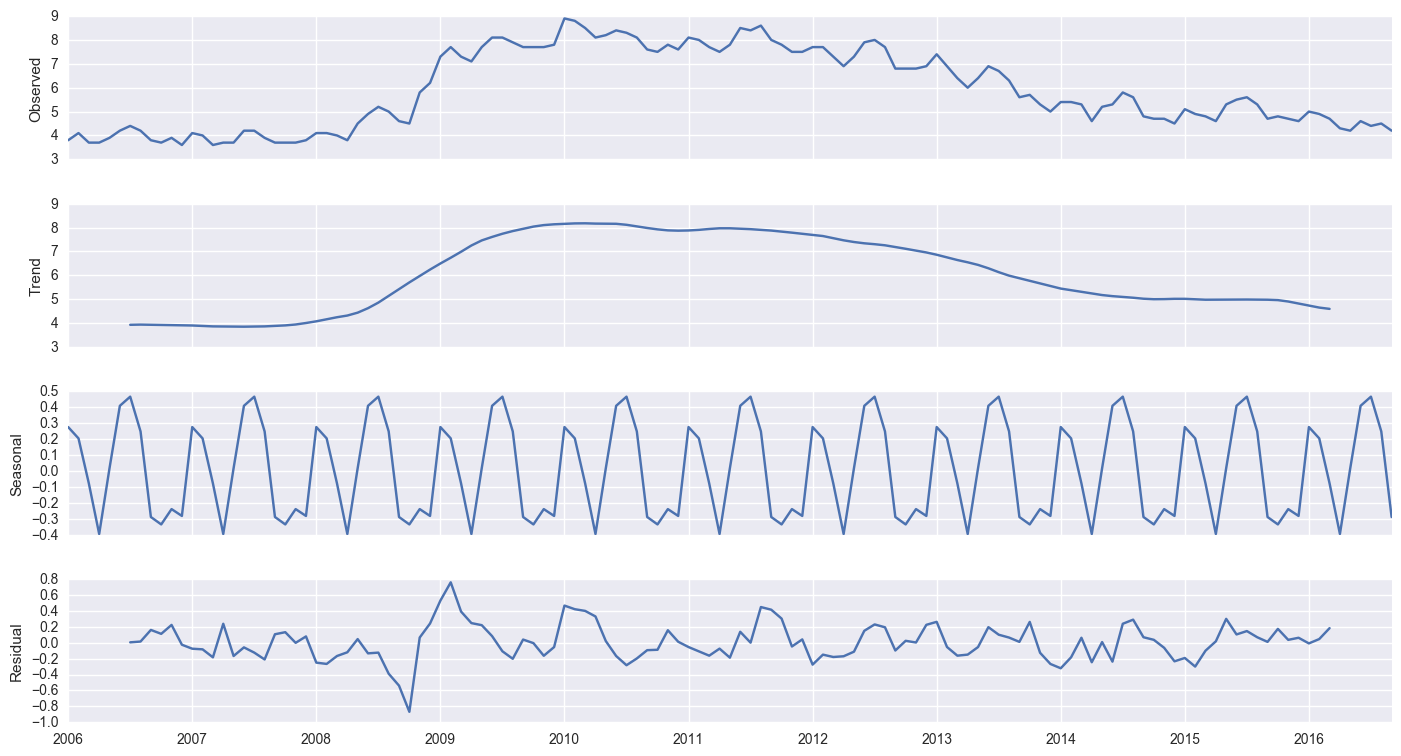

In [10]:
decomposition_RDU = seasonal_decompose(df.RDU_UR, freq=12)  
fig = plt.figure()  
fig = decomposition_RDU.plot()  
fig.set_size_inches(15, 8)

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


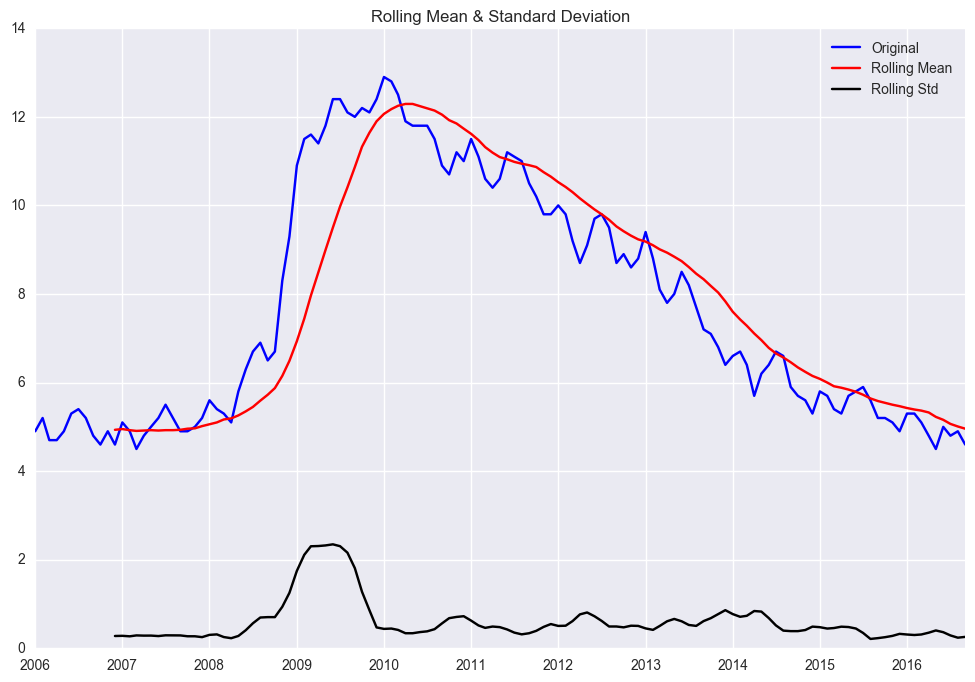

Results of Dickey-Fuller Test:
Test Statistic                  -2.218791
p-value                          0.199496
#Lags Used                      12.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [12]:
test_stationarity(df.CLT_UR)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


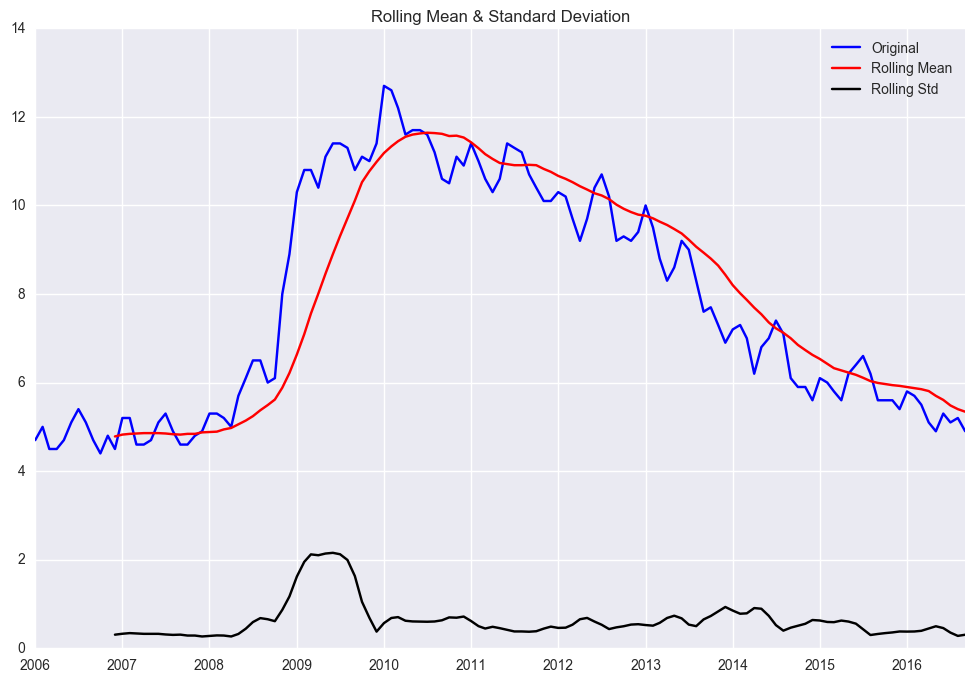

Results of Dickey-Fuller Test:
Test Statistic                  -2.282620
p-value                          0.177635
#Lags Used                      12.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [13]:
test_stationarity(df.GSO_UR)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


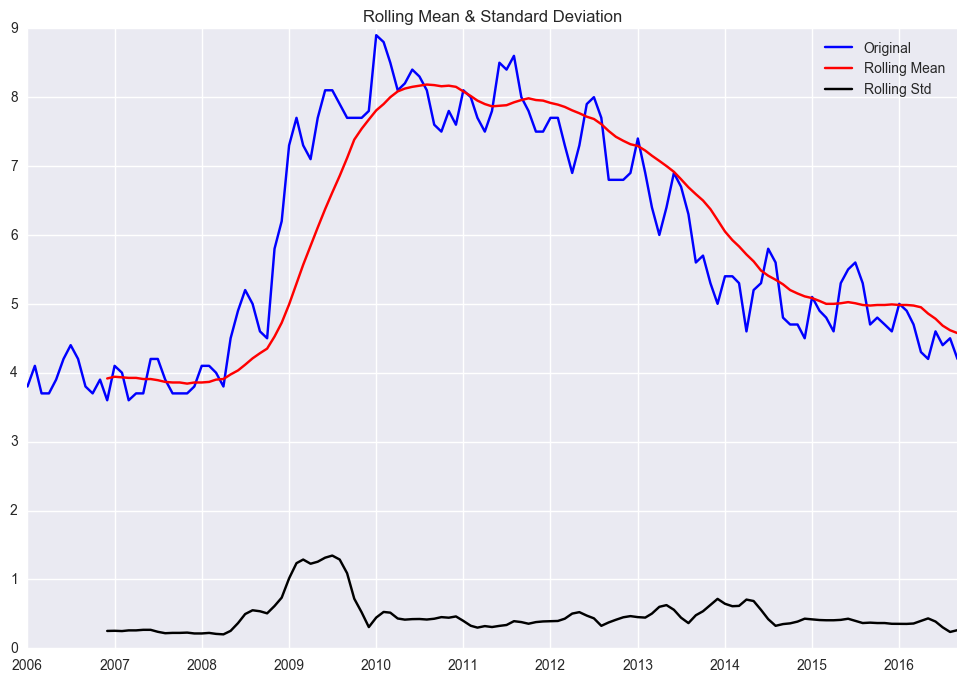

Results of Dickey-Fuller Test:
Test Statistic                  -2.235226
p-value                          0.193710
#Lags Used                      12.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [14]:
test_stationarity(df.RDU_UR)

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


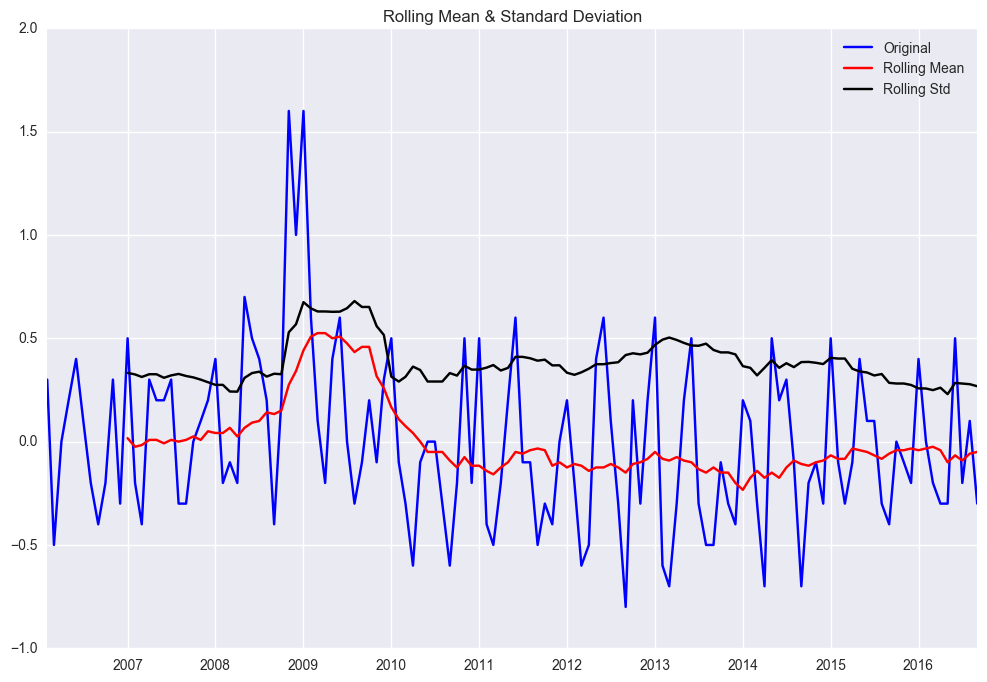

Results of Dickey-Fuller Test:
Test Statistic                  -1.611090
p-value                          0.477403
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [15]:
df['CLT_first_difference'] = df.CLT_UR - df.CLT_UR.shift(1)  
test_stationarity(df.CLT_first_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


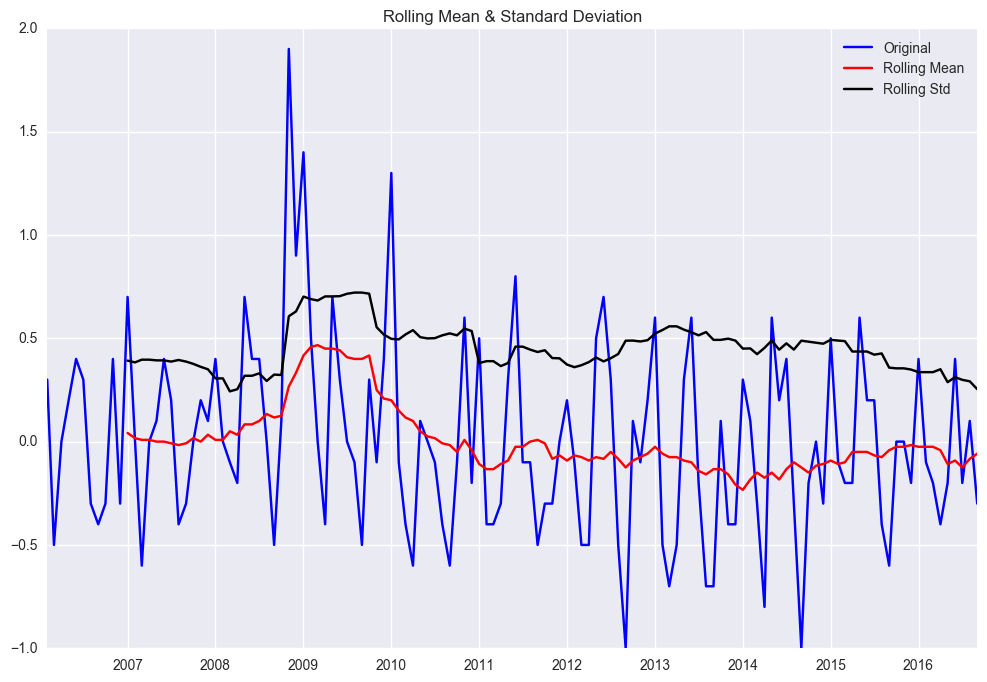

Results of Dickey-Fuller Test:
Test Statistic                  -1.453325
p-value                          0.556462
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [16]:
df['GSO_first_difference'] = df.GSO_UR - df.GSO_UR.shift(1)  
test_stationarity(df.GSO_first_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


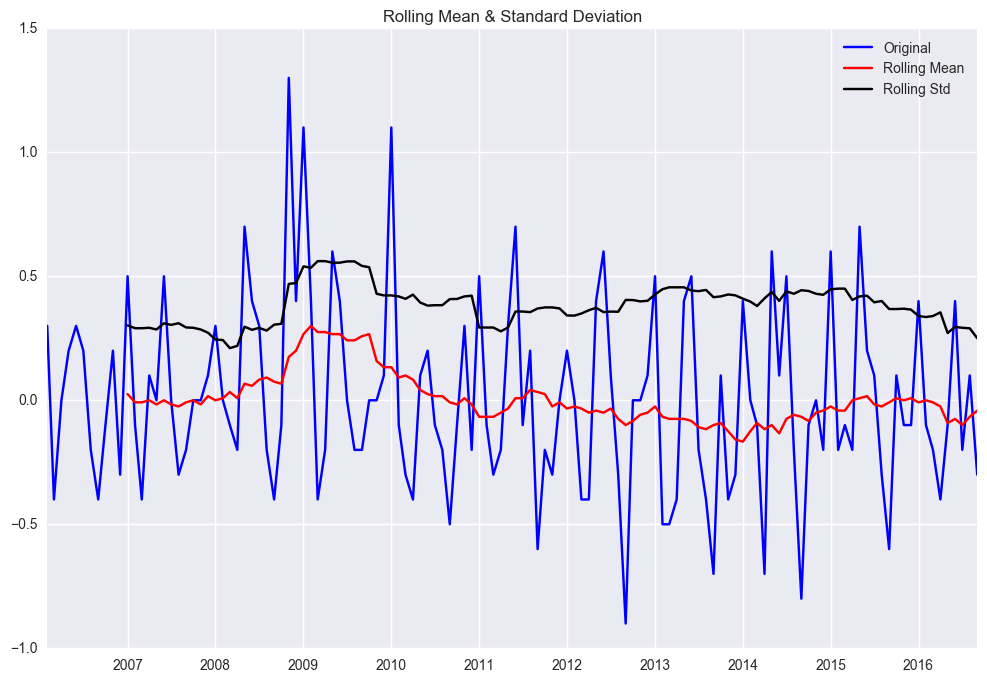

Results of Dickey-Fuller Test:
Test Statistic                  -1.538883
p-value                          0.514196
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (5%)             -2.886797
Critical Value (1%)             -3.488022
Critical Value (10%)            -2.580241
dtype: float64


In [17]:
df['RDU_first_difference'] = df.RDU_UR - df.RDU_UR.shift(1)  
test_stationarity(df.RDU_first_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


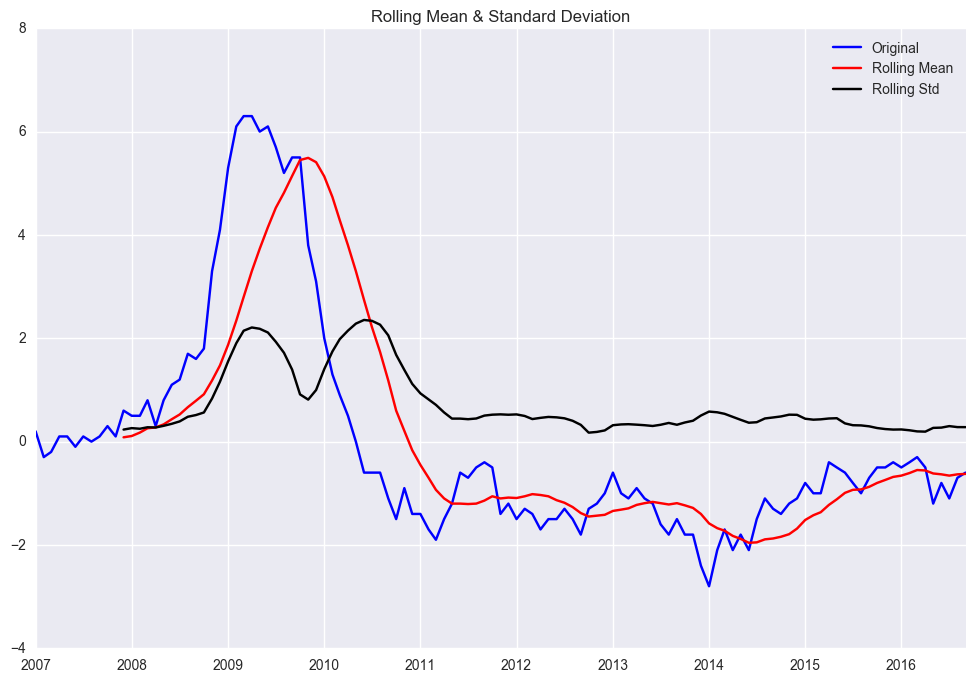

Results of Dickey-Fuller Test:
Test Statistic                  -1.517794
p-value                          0.524691
#Lags Used                      13.000000
Number of Observations Used    103.000000
Critical Value (5%)             -2.890037
Critical Value (1%)             -3.495493
Critical Value (10%)            -2.581971
dtype: float64


In [18]:
df['CLT_seasonal_difference'] = df.CLT_UR - df.CLT_UR.shift(12)  
test_stationarity(df.CLT_seasonal_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


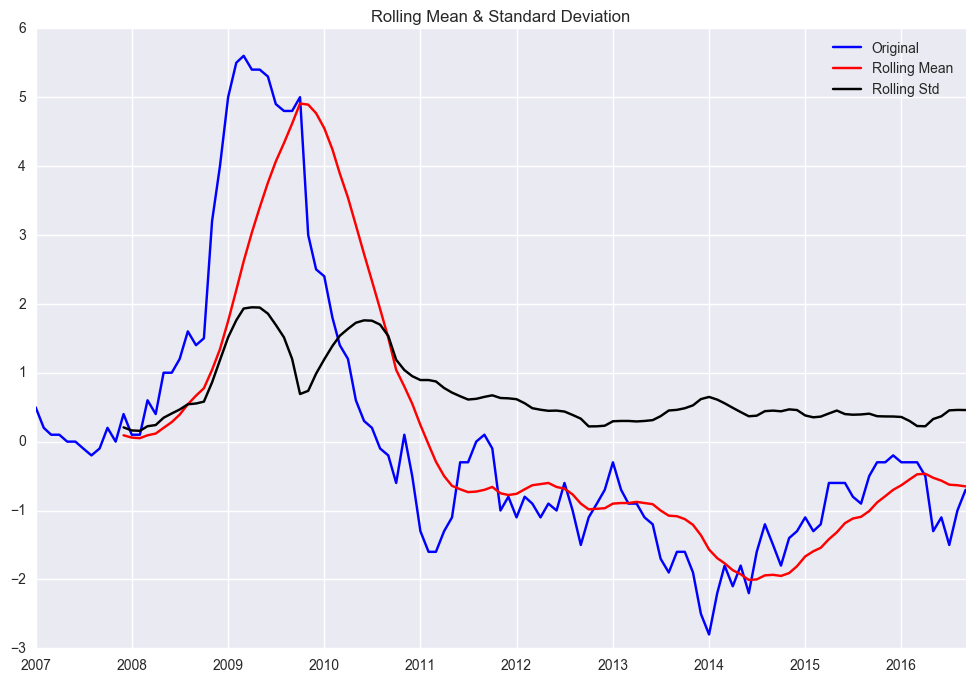

Results of Dickey-Fuller Test:
Test Statistic                  -1.519605
p-value                          0.523792
#Lags Used                      13.000000
Number of Observations Used    103.000000
Critical Value (5%)             -2.890037
Critical Value (1%)             -3.495493
Critical Value (10%)            -2.581971
dtype: float64


In [19]:
df['GSO_seasonal_difference'] = df.GSO_UR - df.GSO_UR.shift(12)  
test_stationarity(df.GSO_seasonal_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


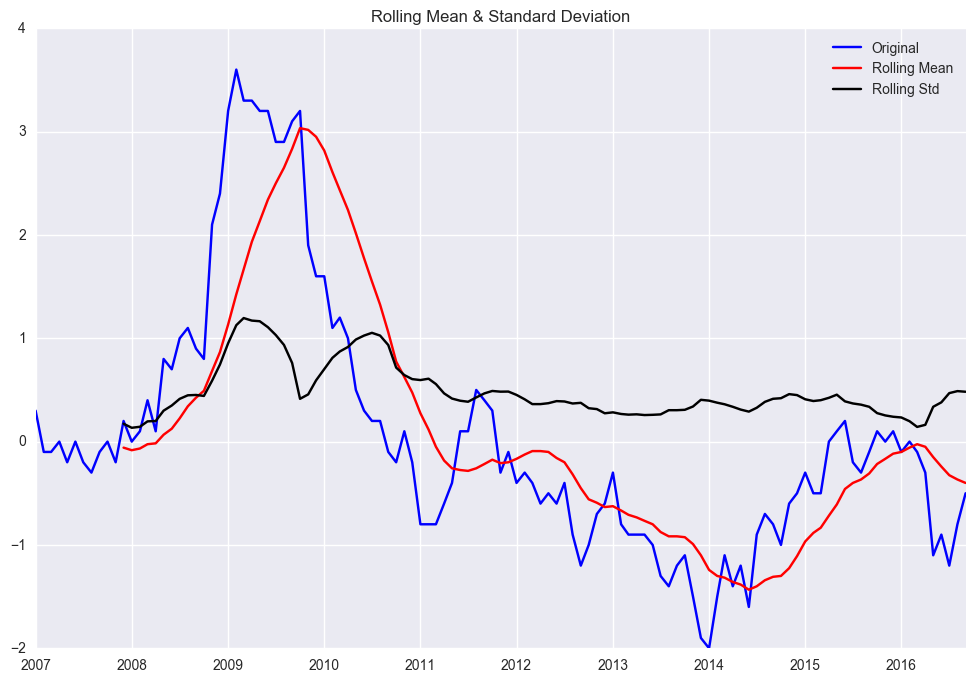

Results of Dickey-Fuller Test:
Test Statistic                  -1.372823
p-value                          0.595233
#Lags Used                      12.000000
Number of Observations Used    104.000000
Critical Value (5%)             -2.889758
Critical Value (1%)             -3.494850
Critical Value (10%)            -2.581822
dtype: float64


In [20]:
df['RDU_seasonal_difference'] = df.RDU_UR - df.RDU_UR.shift(12)  
test_stationarity(df.RDU_seasonal_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


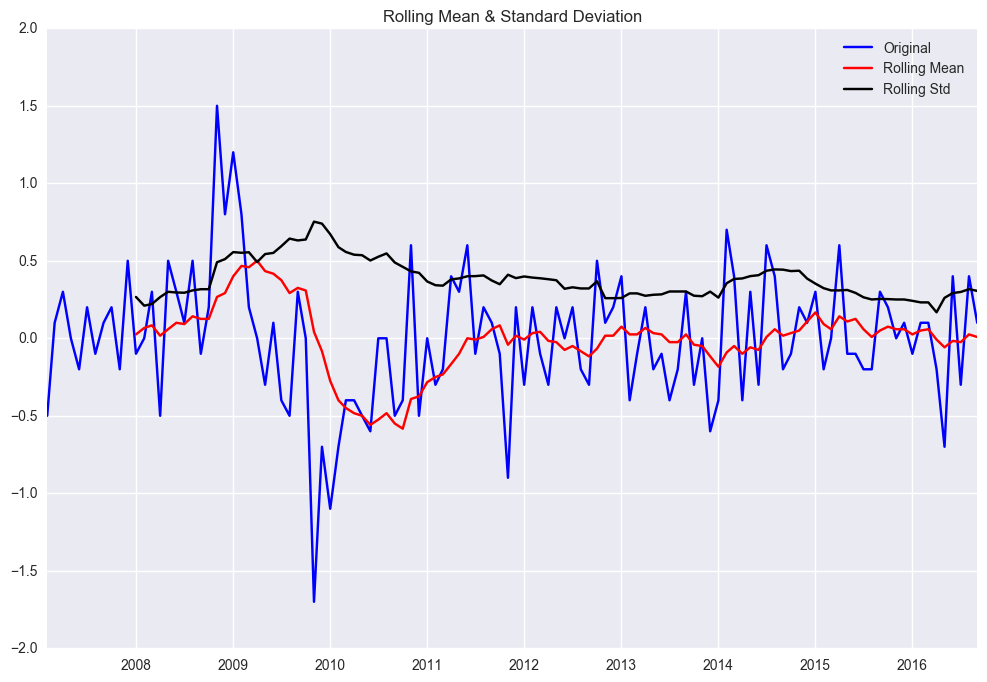

Results of Dickey-Fuller Test:
Test Statistic                  -3.183851
p-value                          0.020939
#Lags Used                      12.000000
Number of Observations Used    103.000000
Critical Value (5%)             -2.890037
Critical Value (1%)             -3.495493
Critical Value (10%)            -2.581971
dtype: float64


In [21]:
df['CLT_seasonal_first_difference'] = df.CLT_first_difference - df.CLT_first_difference.shift(12)  
test_stationarity(df.CLT_seasonal_first_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


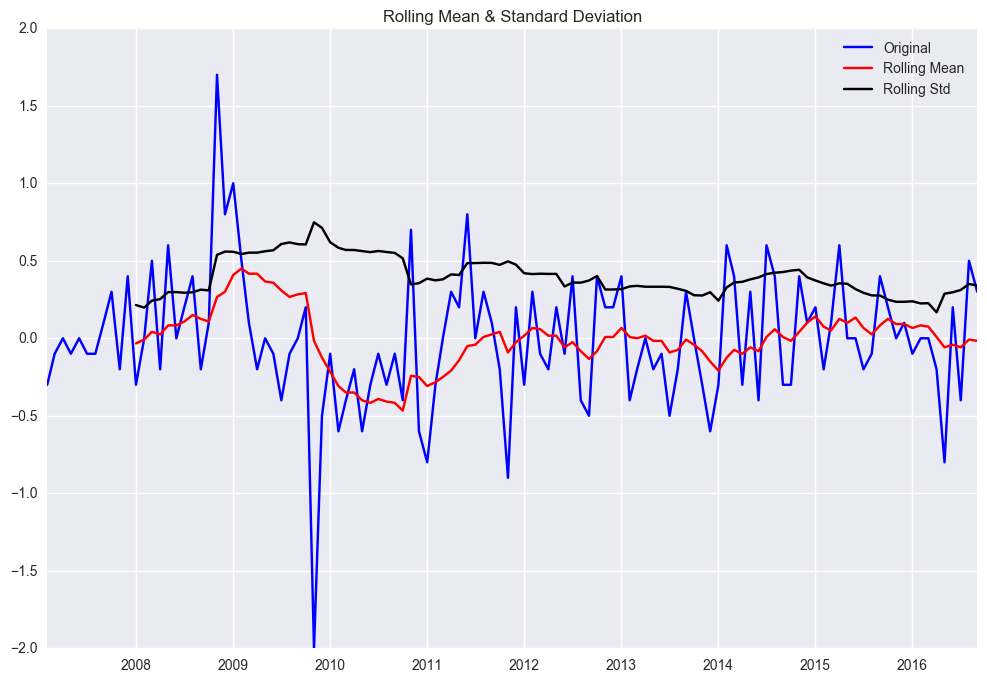

Results of Dickey-Fuller Test:
Test Statistic                  -3.105916
p-value                          0.026118
#Lags Used                      12.000000
Number of Observations Used    103.000000
Critical Value (5%)             -2.890037
Critical Value (1%)             -3.495493
Critical Value (10%)            -2.581971
dtype: float64


In [22]:
df['GSO_seasonal_first_difference'] = df.GSO_first_difference - df.GSO_first_difference.shift(12)  
test_stationarity(df.GSO_seasonal_first_difference.dropna(inplace=False))

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


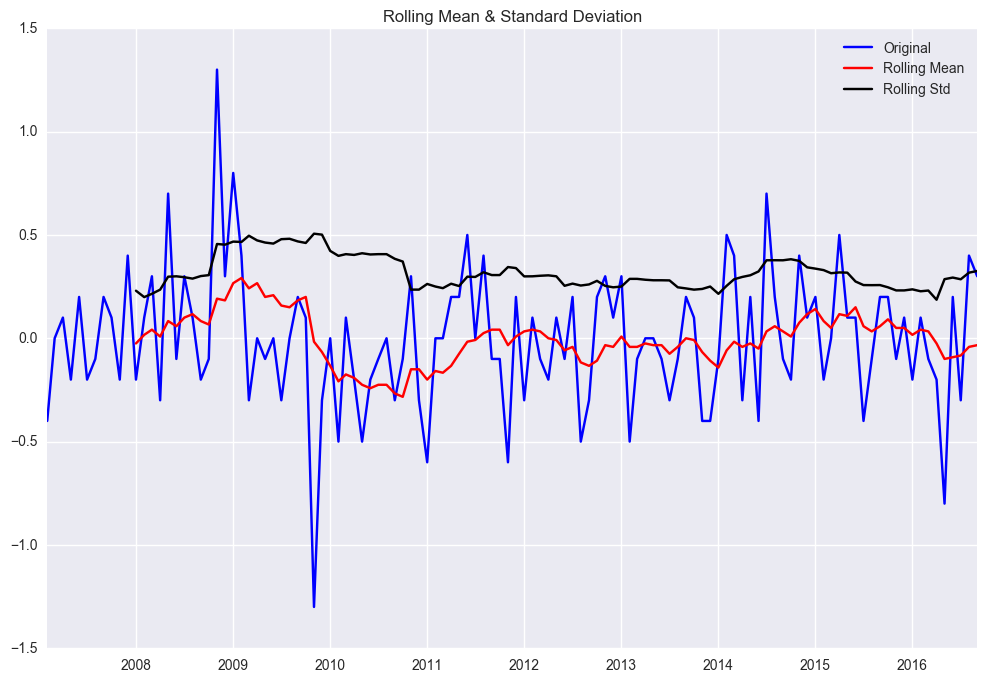

Results of Dickey-Fuller Test:
Test Statistic                  -2.449443
p-value                          0.128265
#Lags Used                      13.000000
Number of Observations Used    102.000000
Critical Value (5%)             -2.890321
Critical Value (1%)             -3.496149
Critical Value (10%)            -2.582122
dtype: float64


In [23]:
df['RDU_seasonal_first_difference'] = df.RDU_first_difference - df.RDU_first_difference.shift(12)  
test_stationarity(df.RDU_seasonal_first_difference.dropna(inplace=False))

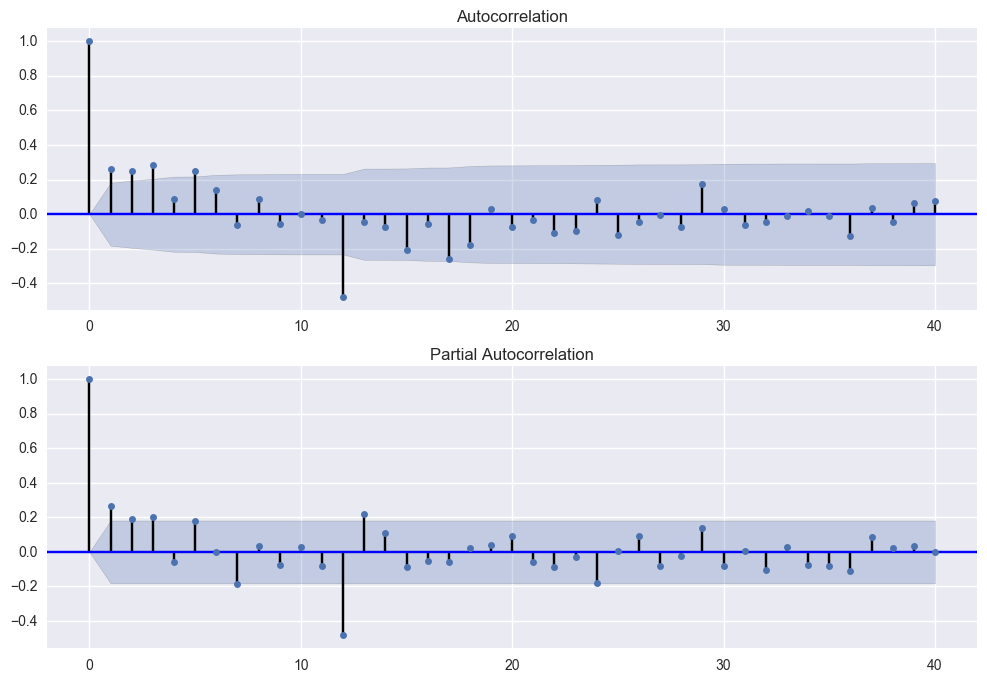

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.CLT_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.CLT_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

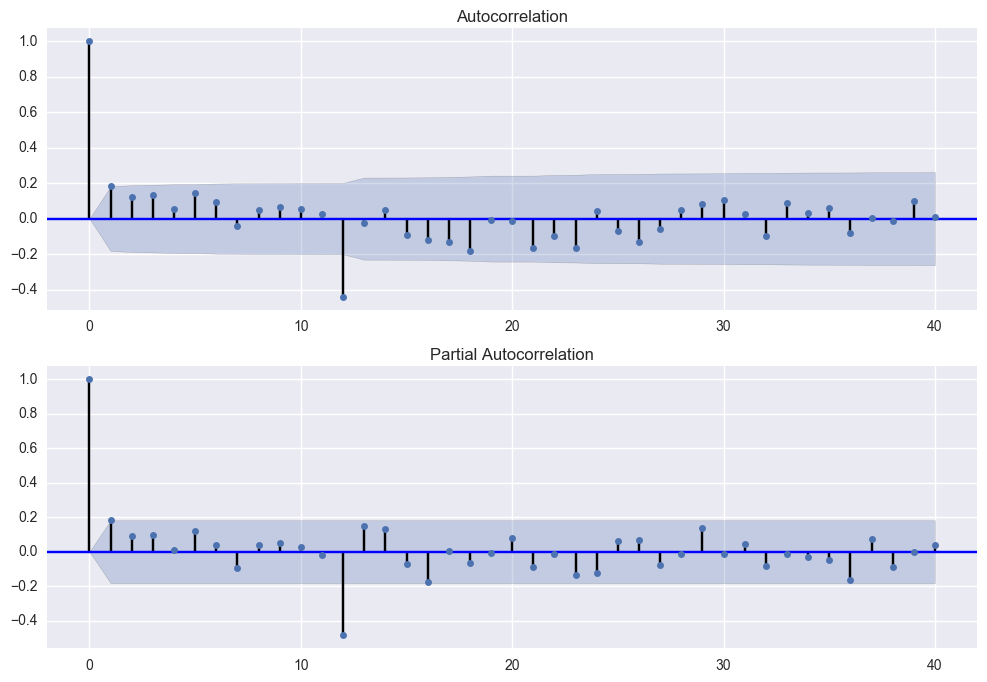

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.GSO_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.GSO_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

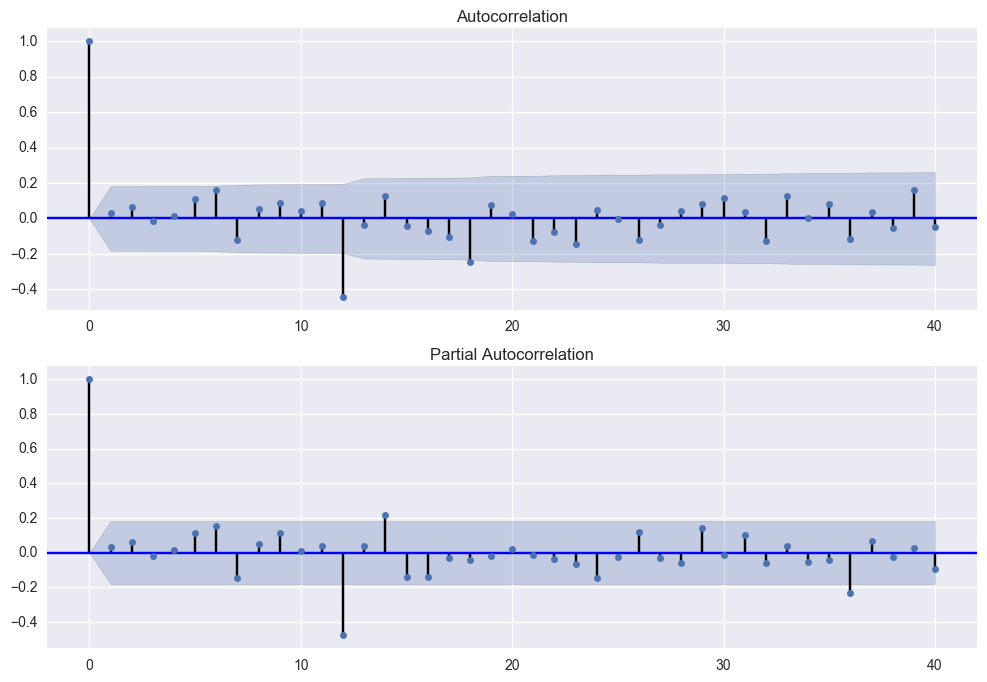

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.RDU_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.RDU_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [27]:
mod = sm.tsa.statespace.SARIMAX(df.CLT_UR, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results_CLT = mod.fit()
print results_CLT.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             CLT_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                 -43.248
Date:                            Wed, 04 Jan 2017   AIC                             90.496
Time:                                    10:07:51   BIC                             96.216
Sample:                                01-01-2006   HQIC                            92.820
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7947      0.118     -6.717      0.000      -1.027      -0.563
sigma2         0.1114      0.014   

In [28]:
mod = sm.tsa.statespace.SARIMAX(df.GSO_UR, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results_GSO = mod.fit()
print results_GSO.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             GSO_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                 -46.705
Date:                            Wed, 04 Jan 2017   AIC                             97.410
Time:                                    10:08:04   BIC                            103.129
Sample:                                01-01-2006   HQIC                            99.734
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7482      0.099     -7.533      0.000      -0.943      -0.554
sigma2         0.1204      0.014   

In [29]:
mod = sm.tsa.statespace.SARIMAX(df.RDU_UR, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results_RDU = mod.fit()
print results_RDU.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             RDU_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                 -15.457
Date:                            Wed, 04 Jan 2017   AIC                             34.913
Time:                                    10:08:24   BIC                             40.633
Sample:                                01-01-2006   HQIC                            37.237
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7739      0.102     -7.617      0.000      -0.973      -0.575
sigma2         0.0696      0.008   

In [30]:
mod = sm.tsa.statespace.SARIMAX(df.CLT_UR, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_CLT = mod.fit()
print results_CLT.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             CLT_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                 -43.161
Date:                            Wed, 04 Jan 2017   AIC                             92.321
Time:                                    10:08:27   BIC                            100.901
Sample:                                01-01-2006   HQIC                            95.807
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0654      0.133      0.492      0.623      -0.195       0.326
ma.S.L12      -0.8563      0.219   

In [31]:
mod = sm.tsa.statespace.SARIMAX(df.GSO_UR, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_GSO = mod.fit()
print results_GSO.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             GSO_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                 -46.310
Date:                            Wed, 04 Jan 2017   AIC                             98.621
Time:                                    10:08:43   BIC                            107.200
Sample:                                01-01-2006   HQIC                           102.107
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1442      0.124      1.161      0.245      -0.099       0.388
ma.S.L12      -0.8841      0.243   

In [32]:
mod = sm.tsa.statespace.SARIMAX(df.RDU_UR, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_RDU = mod.fit()
print results_RDU.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             RDU_UR   No. Observations:                  129
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                 -15.336
Date:                            Wed, 04 Jan 2017   AIC                             36.672
Time:                                    10:08:59   BIC                             45.251
Sample:                                01-01-2006   HQIC                            40.158
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0726      0.128      0.565      0.572      -0.179       0.324
ma.S.L12      -0.8308      0.160   

C:\Users\akumar\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\data.py:551: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(squeezed, index=self.predict_dates)


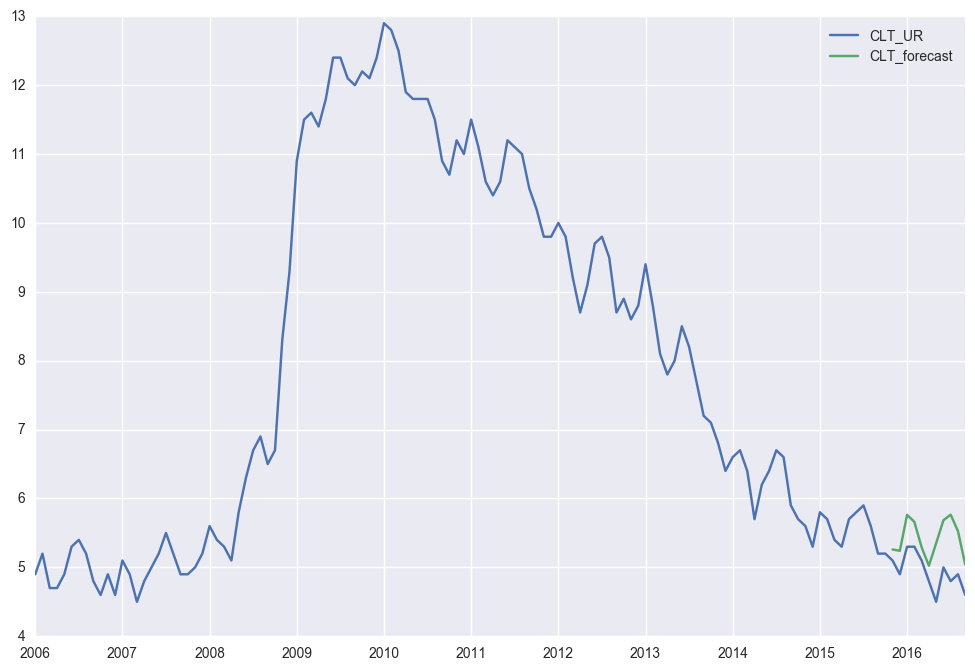

In [33]:
df['CLT_forecast'] = results_CLT.predict(start = 118, end= 130, dynamic= True)  
df[['CLT_UR', 'CLT_forecast']].plot(figsize=(12, 8)) 
#plt.savefig('ts_df_predict.png', bbox_inches='tight')

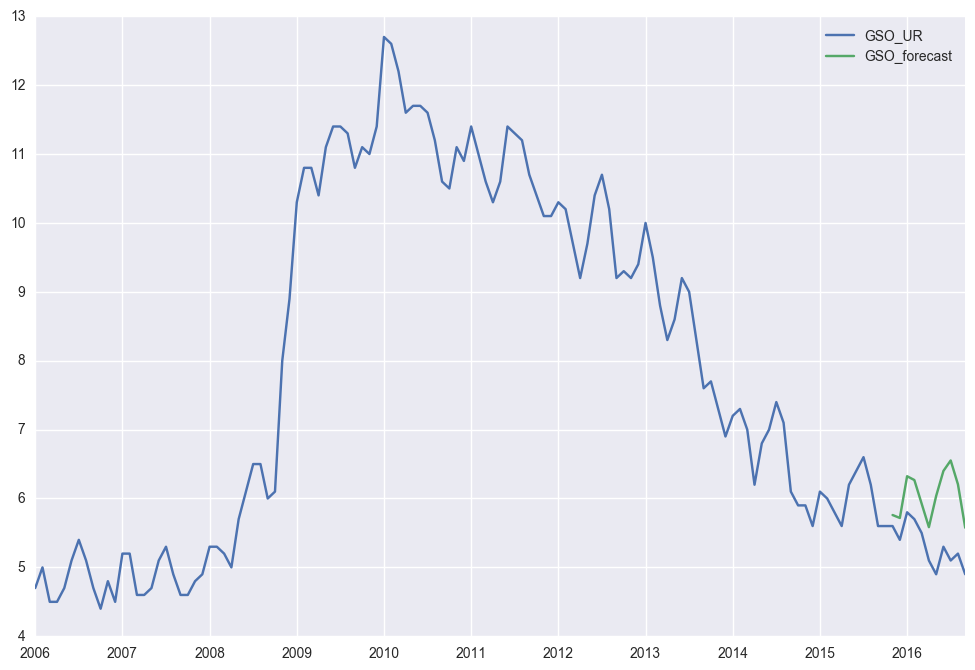

In [34]:
df['GSO_forecast'] = results_GSO.predict(start = 118, end= 130, dynamic= True)  
df[['GSO_UR', 'GSO_forecast']].plot(figsize=(12, 8)) 
#plt.savefig('ts_df_predict.png', bbox_inches='tight')

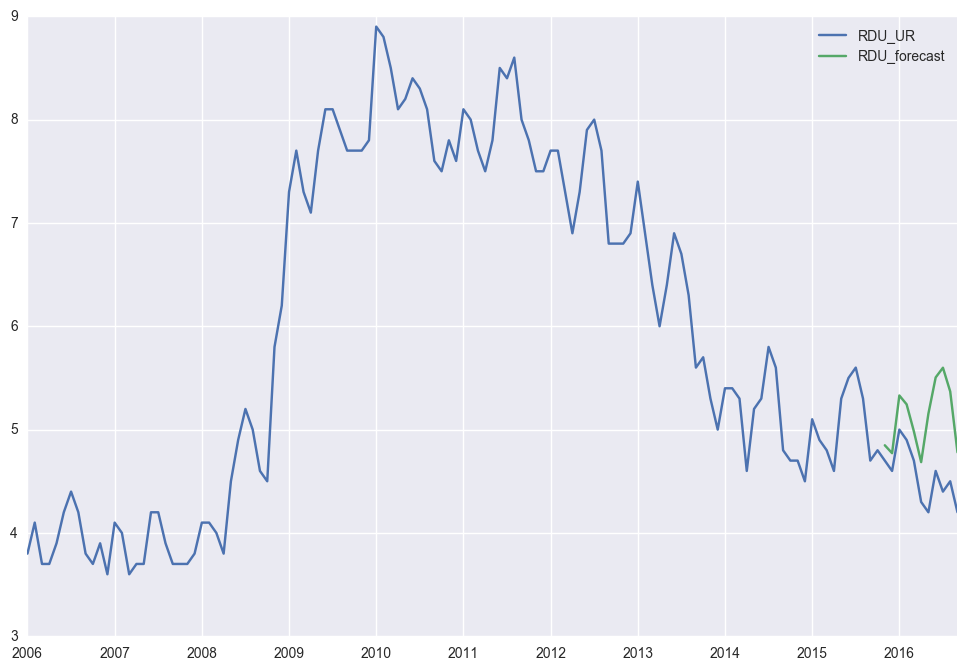

In [35]:
df['RDU_forecast'] = results_RDU.predict(start = 118, end= 130, dynamic= True)  
df[['RDU_UR', 'RDU_forecast']].plot(figsize=(12, 8)) 
#plt.savefig('ts_df_predict.png', bbox_inches='tight')

In [36]:
df

,USA_LF,USA_UR,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,...,RDU_first_difference,CLT_seasonal_difference,GSO_seasonal_difference,RDU_seasonal_difference,CLT_seasonal_first_difference,GSO_seasonal_first_difference,RDU_seasonal_first_difference,CLT_forecast,GSO_forecast,RDU_forecast
2006-01-01,150214,4.7,360198,4.7,1014866,4.9,245718,3.8,276661,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,150641,4.8,362938,5.0,1021495,5.2,247942,4.1,276445,4.1,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,150813,4.7,364353,4.5,1027071,4.7,249102,3.7,278255,3.8,...,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,150881,4.7,366655,4.5,1032285,4.7,248950,3.7,278101,3.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,151069,4.6,370078,4.7,1040587,4.9,251530,3.9,281095,3.8,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,151354,4.6,370414,5.1,1042765,5.3,254221,4.2,284704,4.0,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,151377,4.7,373952,5.4,1049796,5.4,257485,4.4,287259,4.0,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,151716,4.7,372268,5.1,1054405,5.2,256076,4.2,287051,3.9,...,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,151662,4.5,369509,4.7,1056308,4.8,255396,3.8,282479,3.4,...,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,152041,4.4,373487,4.4,1065042,4.6,256627,3.7,281671,3.2,...,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


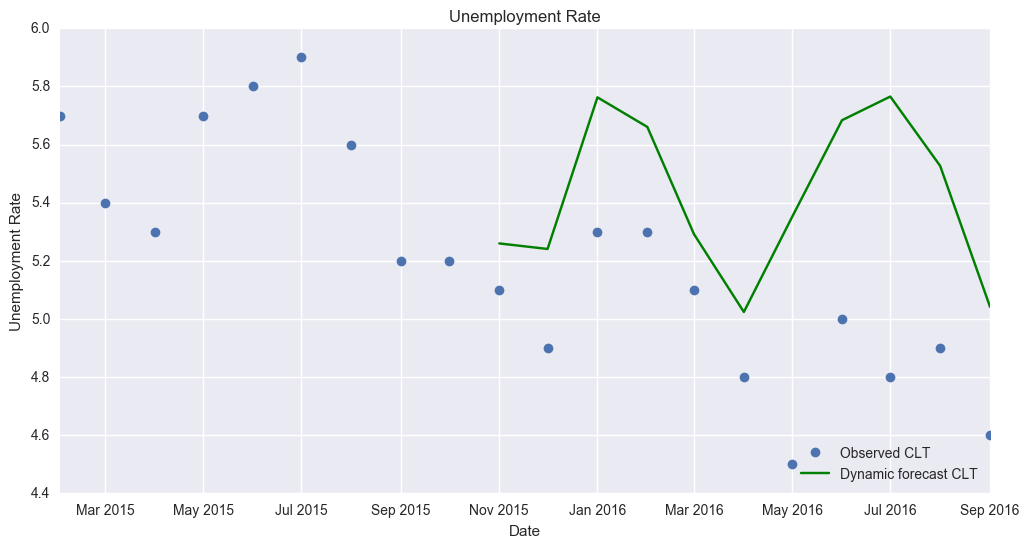

In [37]:
npredict =df.CLT_UR['2016'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Unemployment Rate', xlabel='Date', ylabel='Unemployment Rate')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'CLT_UR'], 'o', label='Observed CLT') 
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'CLT_forecast'], 'g', label='Dynamic forecast CLT')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
#plt.savefig('ts_predict_compare.png', bbox_inches='tight')

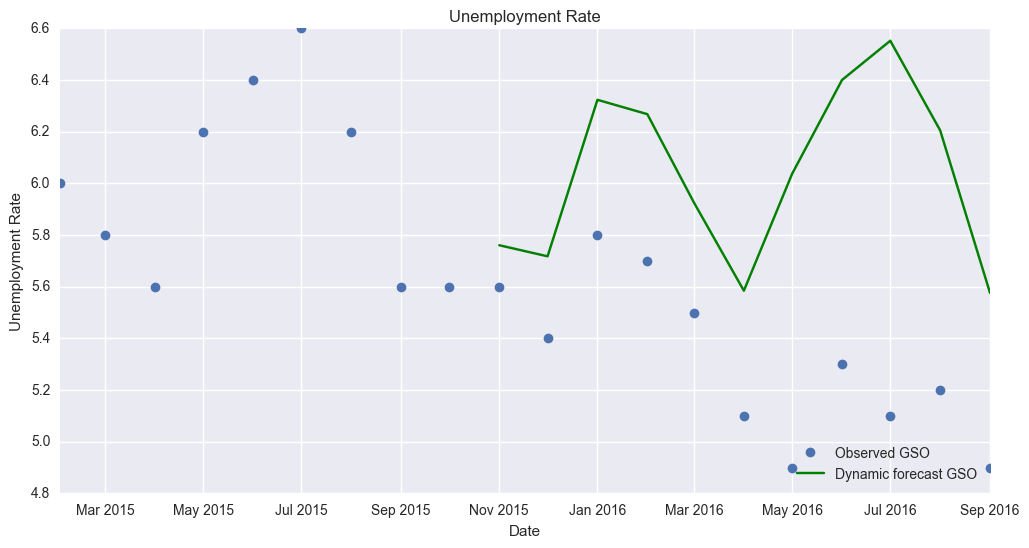

In [38]:
npredict =df.GSO_UR['2016'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Unemployment Rate', xlabel='Date', ylabel='Unemployment Rate')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'GSO_UR'], 'o', label='Observed GSO') 
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'GSO_forecast'], 'g', label='Dynamic forecast GSO')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
#plt.savefig('ts_predict_compare.png', bbox_inches='tight')

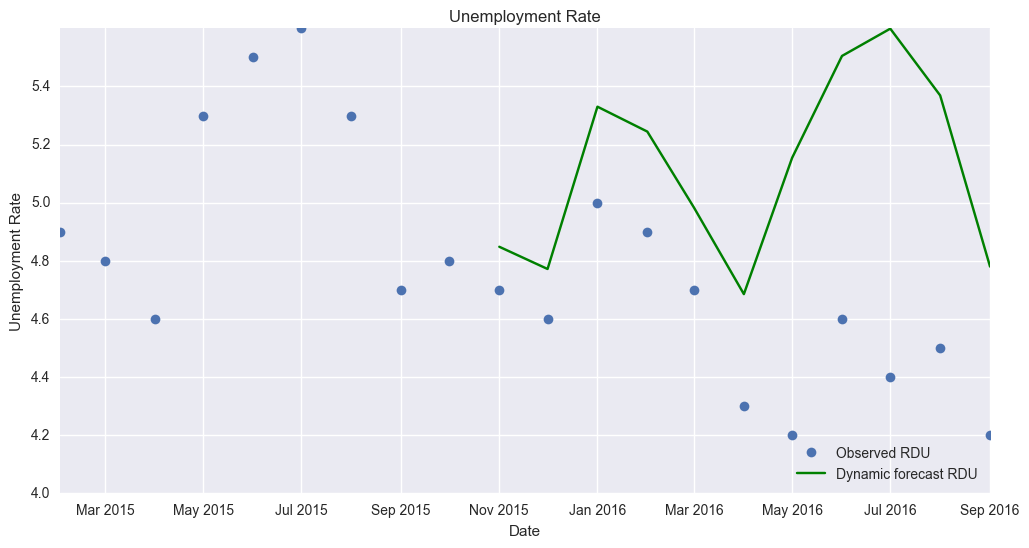

In [39]:
npredict =df.RDU_UR['2016'].shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Unemployment Rate', xlabel='Date', ylabel='Unemployment Rate')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'RDU_UR'], 'o', label='Observed RDU') 
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'RDU_forecast'], 'g', label='Dynamic forecast RDU')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
#plt.savefig('ts_predict_compare.png', bbox_inches='tight')

In [40]:
start = datetime.datetime.strptime("2016-11-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,62)]
future = pd.DataFrame(index=date_list, columns= df.columns)

In [41]:
df_new = pd.concat([df, future])

In [42]:
df_new

,USA_LF,USA_UR,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,...,RDU_first_difference,CLT_seasonal_difference,GSO_seasonal_difference,RDU_seasonal_difference,CLT_seasonal_first_difference,GSO_seasonal_first_difference,RDU_seasonal_first_difference,CLT_forecast,GSO_forecast,RDU_forecast
2006-01-01,150214.0,4.7,360198.0,4.7,1014866.0,4.9,245718.0,3.8,276661.0,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,150641.0,4.8,362938.0,5.0,1021495.0,5.2,247942.0,4.1,276445.0,4.1,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,150813.0,4.7,364353.0,4.5,1027071.0,4.7,249102.0,3.7,278255.0,3.8,...,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,150881.0,4.7,366655.0,4.5,1032285.0,4.7,248950.0,3.7,278101.0,3.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,151069.0,4.6,370078.0,4.7,1040587.0,4.9,251530.0,3.9,281095.0,3.8,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,151354.0,4.6,370414.0,5.1,1042765.0,5.3,254221.0,4.2,284704.0,4.0,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,151377.0,4.7,373952.0,5.4,1049796.0,5.4,257485.0,4.4,287259.0,4.0,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,151716.0,4.7,372268.0,5.1,1054405.0,5.2,256076.0,4.2,287051.0,3.9,...,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,151662.0,4.5,369509.0,4.7,1056308.0,4.8,255396.0,3.8,282479.0,3.4,...,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,152041.0,4.4,373487.0,4.4,1065042.0,4.6,256627.0,3.7,281671.0,3.2,...,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


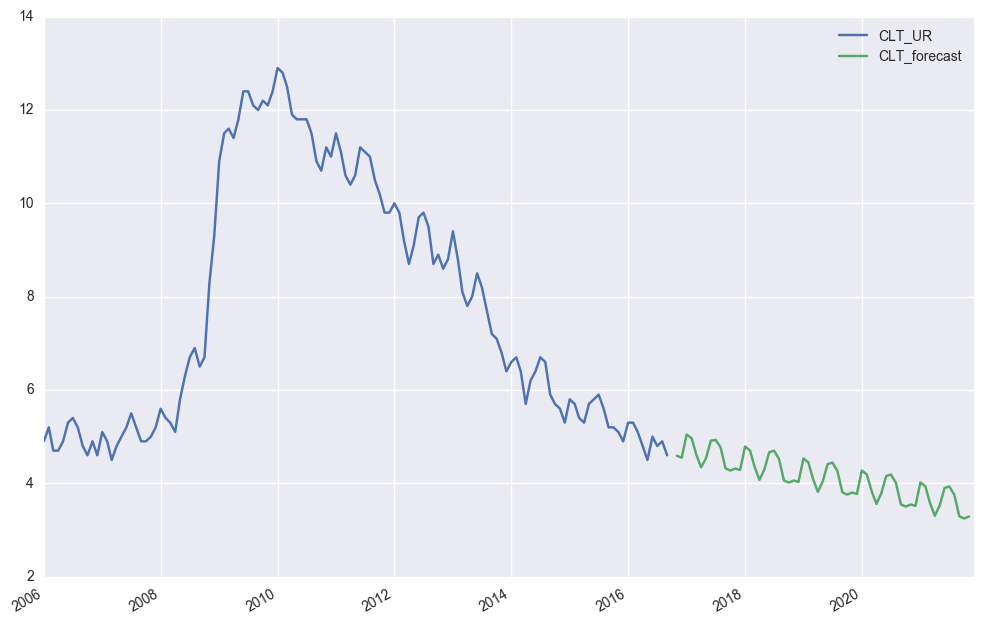

In [43]:
df_new['CLT_forecast'] = results_CLT.predict(start = 129, end = 190, dynamic= True)  
df_new[['CLT_UR', 'CLT_forecast']].ix[-191:].plot(figsize=(12, 8)).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

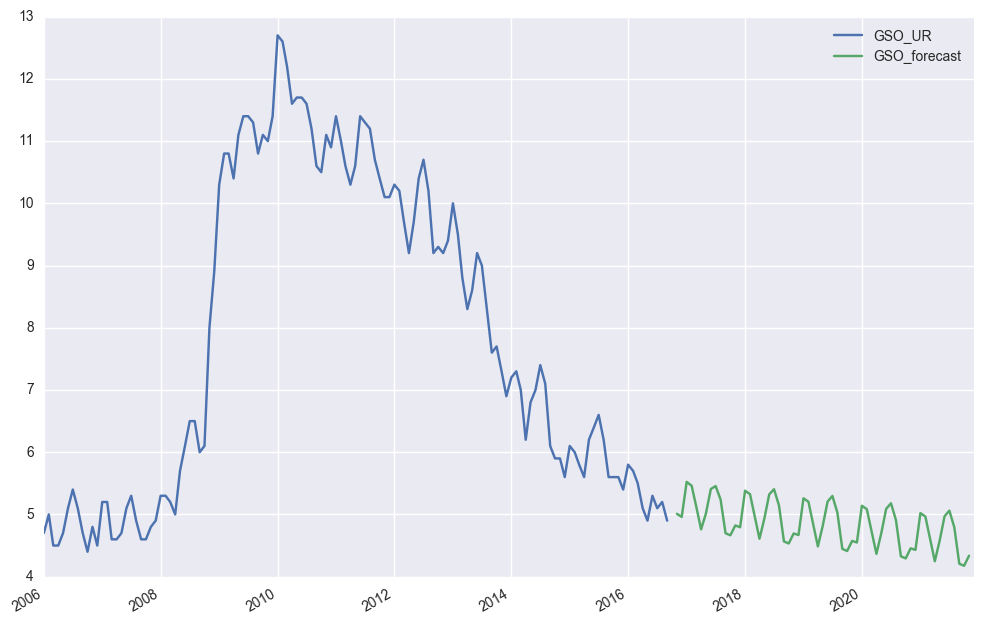

In [44]:
df_new['GSO_forecast'] = results_GSO.predict(start = 129, end = 190, dynamic= True)  
df_new[['GSO_UR', 'GSO_forecast']].ix[-191:].plot(figsize=(12, 8)).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

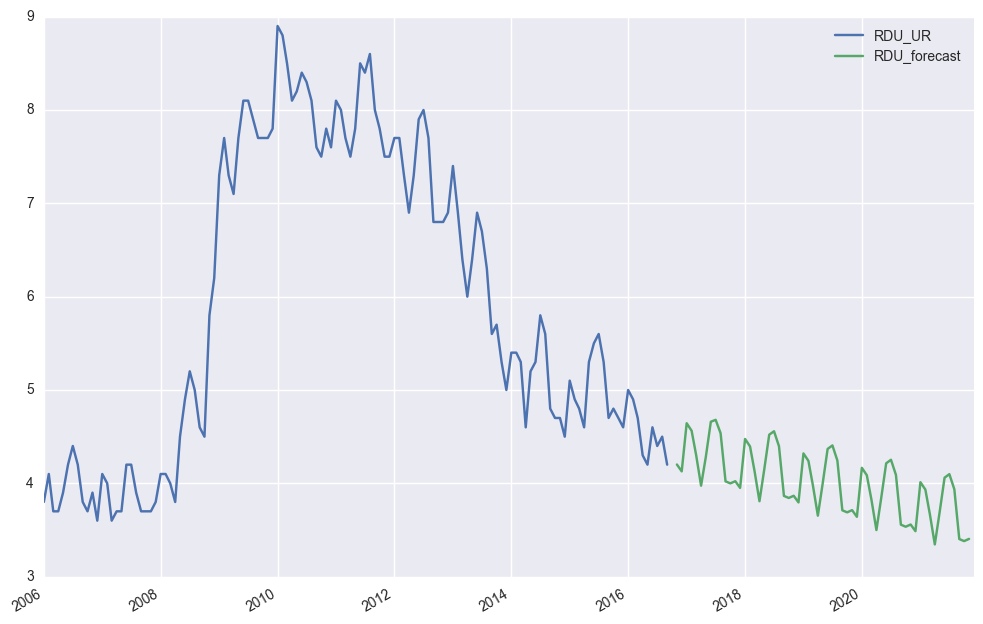

In [45]:
df_new['RDU_forecast'] = results_RDU.predict(start = 129, end = 190, dynamic= True)  
df_new[['RDU_UR', 'RDU_forecast']].ix[-191:].plot(figsize=(12, 8)).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

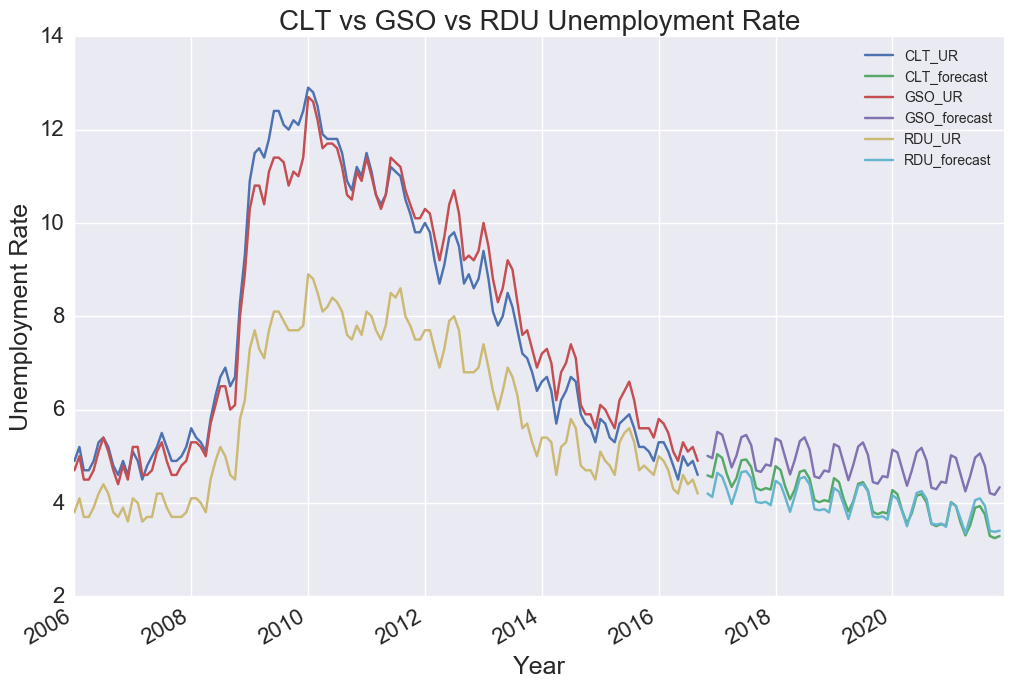

In [48]:
df_new[['CLT_UR', 'CLT_forecast', 'GSO_UR', 'GSO_forecast', 'RDU_UR', 'RDU_forecast']].ix[-191:].plot(figsize=(12, 8)).get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Unemployment Rate',fontsize=18)
plt.title('CLT vs GSO vs RDU Unemployment Rate', fontsize=20)
import matplotlib 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.savefig('CLT vs GSO vs RDU Unemployment Rate.jpeg', bbox_inches='tight')

In [47]:
df_new

,USA_LF,USA_UR,GSO_LF,GSO_UR,CLT_LF,CLT_UR,RDU_LF,RDU_UR,Harrisburg_LF,Harrisburg_UR,...,RDU_first_difference,CLT_seasonal_difference,GSO_seasonal_difference,RDU_seasonal_difference,CLT_seasonal_first_difference,GSO_seasonal_first_difference,RDU_seasonal_first_difference,CLT_forecast,GSO_forecast,RDU_forecast
2006-01-01,150214.0,4.7,360198.0,4.7,1014866.0,4.9,245718.0,3.8,276661.0,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,150641.0,4.8,362938.0,5.0,1021495.0,5.2,247942.0,4.1,276445.0,4.1,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,150813.0,4.7,364353.0,4.5,1027071.0,4.7,249102.0,3.7,278255.0,3.8,...,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,150881.0,4.7,366655.0,4.5,1032285.0,4.7,248950.0,3.7,278101.0,3.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,151069.0,4.6,370078.0,4.7,1040587.0,4.9,251530.0,3.9,281095.0,3.8,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,151354.0,4.6,370414.0,5.1,1042765.0,5.3,254221.0,4.2,284704.0,4.0,...,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,151377.0,4.7,373952.0,5.4,1049796.0,5.4,257485.0,4.4,287259.0,4.0,...,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,151716.0,4.7,372268.0,5.1,1054405.0,5.2,256076.0,4.2,287051.0,3.9,...,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,151662.0,4.5,369509.0,4.7,1056308.0,4.8,255396.0,3.8,282479.0,3.4,...,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,152041.0,4.4,373487.0,4.4,1065042.0,4.6,256627.0,3.7,281671.0,3.2,...,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
